### 【 EDA - 산포도 】

- 전체 데이터의 분포 즉, 대표값 기준으로 퍼진 정도
- 통계랑 : 편차, 분산, 표준편차, 평균절대편차, 중위절대편차, 백분위수, 사분위수

[1] 모듈 로딩<hr>

In [17]:
import pandas as pd                 ## 데이터 분석용
import numpy as np                  ## 로우 데이터 저장 및 수치 계산용
from statsmodels import robust            ## 통계 관련 모듈용
import matplotlib.pyplot as plt     ## 시각화 모듈
import koreanize_matplotlib         ## 한글 폰트 설정용

In [18]:
# %pip install koreanize-matplotlib     ## 가상환경을 conda로 생성한 경우는 conda 설치
                                        ## conda 미지원 패키지들은 pip로 설치
                                        ## conda install -c conda-forge 패키지
                                        ## conda install 패키지

[2] 데이터 준비 <hr>

In [19]:
## 데이터 파일
DATA_FILE='../DATA/state.csv'

stateDF=pd.read_csv(DATA_FILE)
stateDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


[3] 데이터의 산포도 <hr>

In [23]:
## ================================================================
## 표준편차, 사분위수, 중위절대편차
## ================================================================
##- Pandas
print(f'표준편차 => {stateDF["Population"].std()}')
print(f'1사분위수 => {stateDF["Population"].quantile(0.25)}')
print(f'3사분위수 => {stateDF["Population"].quantile(0.75)}')
print(
    f'사분위수범위 => {stateDF["Population"].quantile(0.75)-stateDF["Population"].quantile(0.25)}'
)

##- Numpy
print(f'표준편차 => {np.std(stateDF["Population"])}')
print(f'1사분위수 => {np.quantile(stateDF["Population"],0.25)}')

print(f'중위절대편차 => {robust.mad(stateDF["Population"])}')

표준편차 => 6848235.347401142
1사분위수 => 1833004.25
3사분위수 => 6680312.25
사분위수범위 => 4847308.0
표준편차 => 6779407.114632265
1사분위수 => 1833004.25
중위절대편차 => 3849876.1459979336


[4] 데이터 분포 시각화 - 상자그림 <hr>

In [28]:
## 인구수 분포 시각화
dataSR=stateDF["Population"]/1_000_000

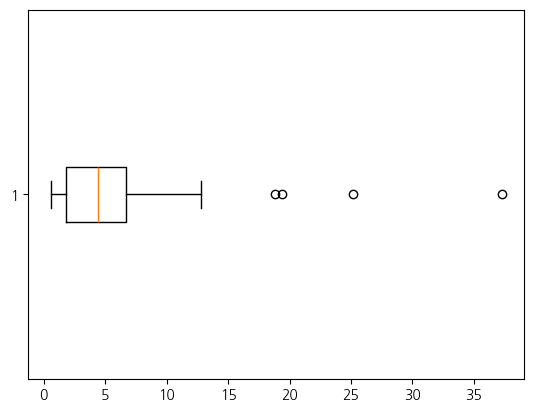

In [32]:
retDict=plt.boxplot(dataSR, vert=False)
plt.show()

In [ ]:
## 상자그래프 결과 => Dict
for key in retDict:
    print(key, retDict[key])

## 이상치 데이터만 추출
outliers=retDict['fliers'][0] 
print("이상치", outliers.get_xdata()) 

whiskers [<matplotlib.lines.Line2D object at 0x000001B6F7844F50>, <matplotlib.lines.Line2D object at 0x000001B6F7DB7350>]
caps [<matplotlib.lines.Line2D object at 0x000001B6F05E3810>, <matplotlib.lines.Line2D object at 0x000001B6F783EC10>]
boxes [<matplotlib.lines.Line2D object at 0x000001B6F7D60F50>]
medians [<matplotlib.lines.Line2D object at 0x000001B6F6FA9810>]
fliers [<matplotlib.lines.Line2D object at 0x000001B6F7859550>]
means []


[4] 데이터 분포 시각화 - 도수분포표/히스토그램 <hr>

Population
L-0    24
L-1    14
L-2     6
L-3     2
L-4     1
L-5     1
L-6     1
L-9     1
L-7     0
L-8     0
Name: count, dtype: int64

(array([7., 1., 1., 0., 1.]), array([ 0. ,  4.8,  9.6, 14.4, 19.2, 24. ]), <BarContainer object of 5 artists>)


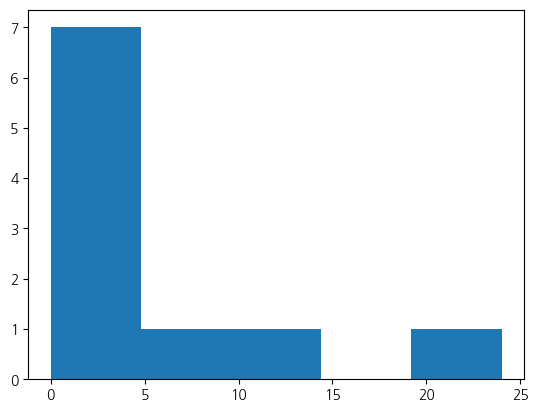

In [50]:
## 수치형 => 범주형 변환. 구간(bin)별로 데이터를 묶어주기
sr, bins=pd.cut(stateDF["Population"], bins=10, retbins=True, labels=[f'L-{idx}' for idx in range(10)])

## 도수분포표
dataSR=sr.value_counts()
display(dataSR)

## 시각화
ret=plt.hist(dataSR.values, bins=5)
print(ret)
plt.show()

(array([24., 14.,  6.,  2.,  1.,  1.,  1.,  0.,  0.,  1.]), array([  563626.,  4232659.,  7901692., 11570725., 15239758., 18908791.,
       22577824., 26246857., 29915890., 33584923., 37253956.]), <BarContainer object of 10 artists>)


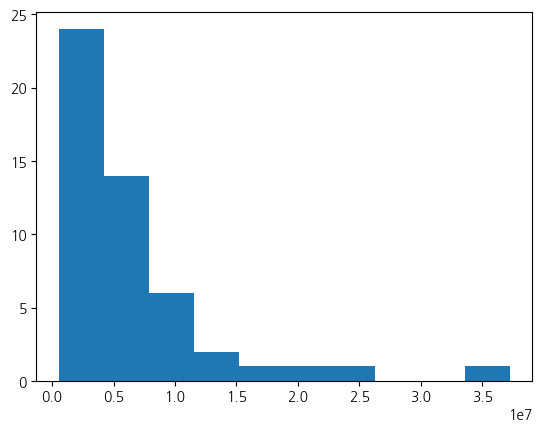

In [52]:
## 시각화
ret = plt.hist(stateDF["Population"], bins=10)
print(ret)
plt.show()